# Mall_Customer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 그래프 한글 깨짐 방지 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [88]:
data = pd.read_csv('Mall_Customers.csv')

In [89]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 - Gender: Gender of customer
 - Age: Age of the customer
 - Annual Income: Annual Income of the customer
 - Spending Score: Score assigned by the mall based on customer behavior and spending nature
 - https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [90]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
#dummy
dummy_gender = pd.get_dummies(data.Gender, drop_first = True)
dummy_gender.columns=['Gender'] #Male:1, Female:0
data.Gender = dummy_gender

In [92]:
#drop custid
data = data.drop(['CustomerID'], axis=1)

In [93]:
data.columns = ['Gender','Age','Annual Income','Spending Score']
data.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## 결측치 확인

In [94]:
data.isnull().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

## 분포 및 상관도

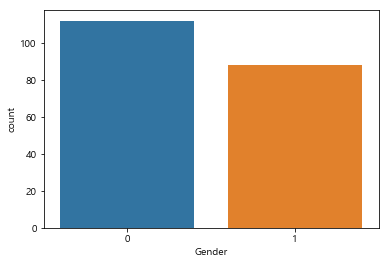

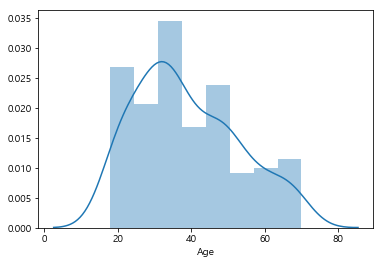

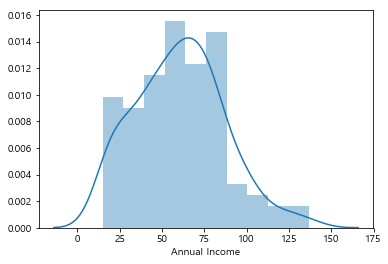

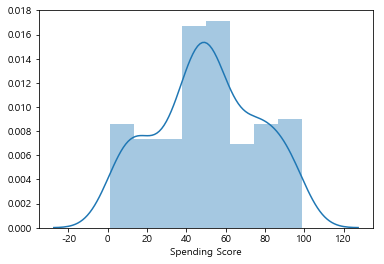

In [95]:
#count and hist
for col in data.columns:
    if col == 'Gender':
        sns.countplot(data[col])
        plt.show()
    else:
        sns.distplot(data[col])
        plt.show()

 - 대부분 골고루 퍼져있음을 확인

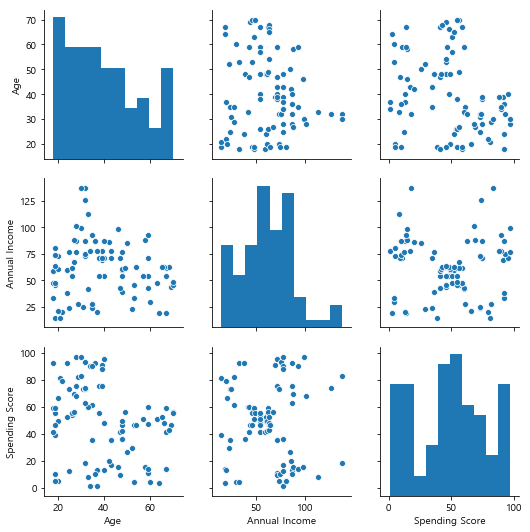

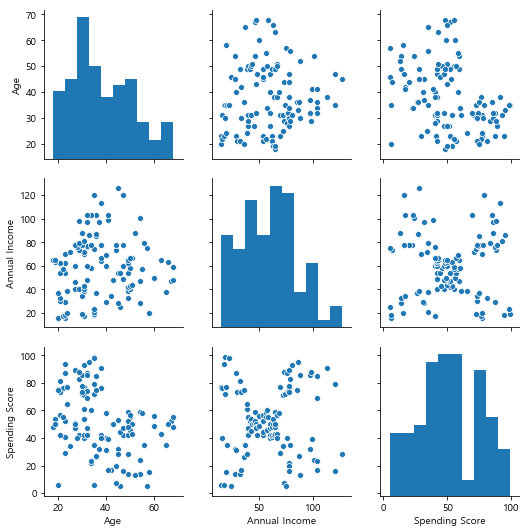

In [96]:
#pairplot
sns.pairplot(data = data[data.Gender == 1].drop(['Gender'], axis=1)) #Only Male data
sns.pairplot(data = data[data.Gender == 0].drop(['Gender'], axis=1)) #Only Female data
plt.show()

 - 성별이 군집에 주는 영향이 적어보인다
 - 성별변수 제외한 데이터를 이용한 clustering 고려 -> Agglomerative Hierarchical Clustering에서 판단해보기
 - 'annual income'과 'spending score' 변수일 때 군집 특성이 보인다

In [97]:
data_without_gender = data.drop(['Gender'], axis = 1)
data_without_gender.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Agglomerative Hierarchical Clustering

In [13]:
from scipy.cluster.hierarchy import dendrogram, ward # ward 방법으로 덴드로그램 그리기
from sklearn.cluster import AgglomerativeClustering
import mglearn

In [98]:
# 데이터 배열 X 에 ward 함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 리턴한다
linkage_array = ward(data)
linkage_array2 = ward(data_without_gender)

Text(0, 0.5, '클러스터 거리')

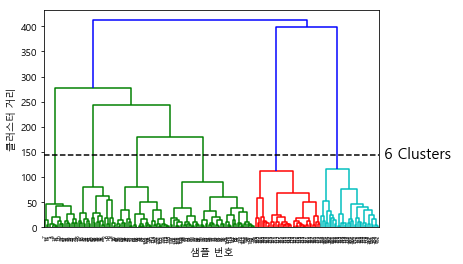

In [78]:
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그린다
dendrogram(linkage_array)

# 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [145, 145], '--', c='k')  # 6개의 클러스터가 생기는 지점
ax.text(bounds[1], 145, ' 6 Clusters ', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

Text(0, 0.5, '클러스터 거리')

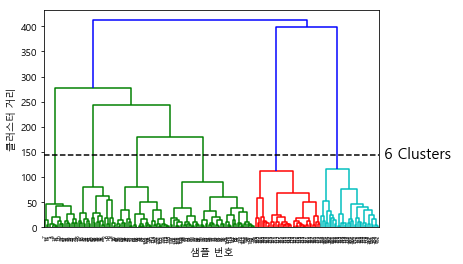

In [99]:
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그린다
dendrogram(linkage_array2)

# 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [145, 145], '--', c='k')  # 6개의 클러스터가 생기는 지점
ax.text(bounds[1], 145, ' 6 Clusters ', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

 - 성별 여부가 군집화 여부에 영향을 적게 미치는것을 확인할 수 있다
 - 따라서 성별 여부 변수를 제외한 numeric 변수들만을 이용해서 clustering

In [100]:
data = data_without_gender
data.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [101]:
agg = AgglomerativeClustering(n_clusters=6) # 계층적 군집화 모델
#pairplot에서 'Annual Income','Spending Score'이 군집이 잘 나눠져있어서 
#2차원 산점도 특성으로 선정
assignment = agg.fit_predict(data[['Annual Income','Spending Score']]) # Data에 적용해서 클러스터 예측하기
assignment

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 5, 0, 5, 0,
       1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

Text(0, 0.5, 'Spending Score')

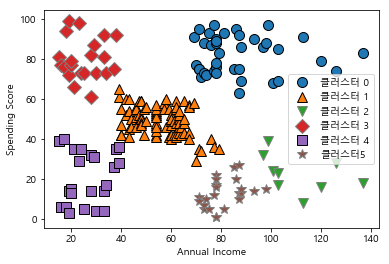

In [102]:
# 2차원 산점도 그래프 그리기(Annual Income, Spending Score, 클러스터 예측 값)
mglearn.discrete_scatter(data['Annual Income'], data['Spending Score'], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2","클러스터 3","클러스터 4",'클러스터5'], loc="best")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

## K-means Clustering

In [103]:
from sklearn.cluster import KMeans

 ### 최적의 군집 수 k 결정 (Elbow Point)

Text(0.5, 1.0, 'Elbow curve')

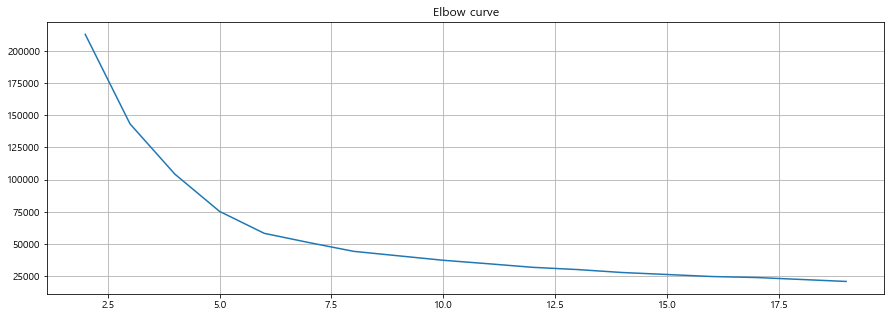

In [104]:
X = data
distorsions = []

# 군집 수 K의 변화에 따라
# Inertia Value: 군집화가 된 후에, 각 중심점에서 군집내의 데이터간의 거리를 합산한 것
# 즉, 군집의 응집도를 나타내는 값
# 이 값을 구해 그래프로 그린다!
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

# 급격하게 하강하다가 변화의 폭이 크지 않는 지점 Elbow Point를 찾는다.

 - k=5 또는 k=6

### clustering

In [105]:
#k=5
model = KMeans(n_clusters=5, algorithm='auto')
model.fit(X)

predict = pd.DataFrame(model.predict(X))
predict.columns = ['predict']

r = pd.concat([X,predict], axis=1)

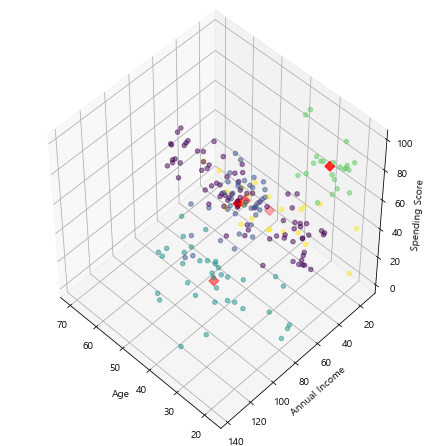

In [106]:
centers = pd.DataFrame(model.cluster_centers_, columns = [X.columns])
center_x = centers['Age']
center_y = centers['Annual Income']
center_z = centers['Spending Score']

from mpl_toolkits.mplot3d import Axes3D
#scatter plot
fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig, rect = [0,0, .95,1], elev = 48, azim=134)
ax.scatter(r['Age'],r['Annual Income'],r['Spending Score'], c = r['predict'], alpha = 0.5)
ax.scatter(center_x, center_y, center_z, s =50, marker = 'D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

In [107]:
#k=6
model = KMeans(n_clusters=6, algorithm='auto')
model.fit(X)

predict = pd.DataFrame(model.predict(X))
predict.columns = ['predict']

r = pd.concat([X,predict], axis=1)

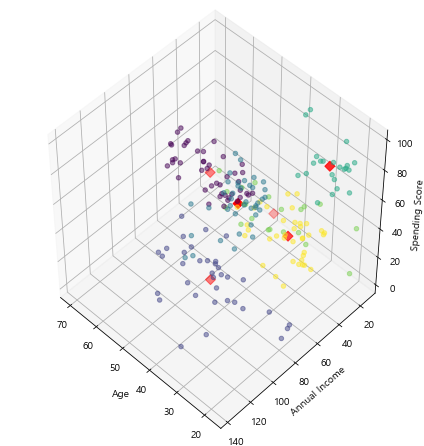

In [108]:
centers = pd.DataFrame(model.cluster_centers_, columns = [X.columns])
center_x = centers['Age']
center_y = centers['Annual Income']
center_z = centers['Spending Score']

from mpl_toolkits.mplot3d import Axes3D
#scatter plot
fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig, rect = [0,0, .95,1], elev = 48, azim=134)
ax.scatter(r['Age'],r['Annual Income'],r['Spending Score'], c = r['predict'], alpha = 0.5)
ax.scatter(center_x, center_y, center_z, s =50, marker = 'D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

 - k = 6일 때, 군집화가 더 잘 된것으로 확인된다.

## DBSCAN

In [26]:
from sklearn.cluster import DBSCAN

# create model and prediction
model = DBSCAN(eps=0.3,min_samples=6)
predict = pd.DataFrame(model.fit_predict(X))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([X,predict],axis=1)

In [140]:
DB = DBSCAN(eps = 8, min_samples=7).fit(X)

In [146]:
predict = DB.fit_predict(X)
predict = pd.DataFrame(predict)
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([X,predict],axis=1)

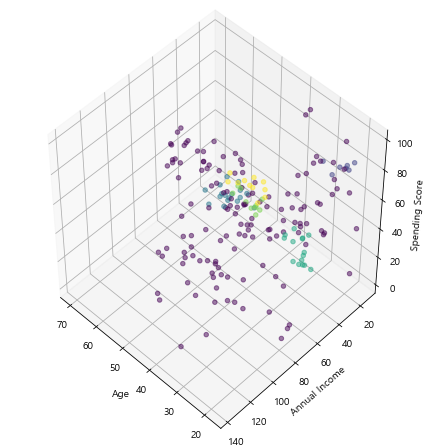

In [147]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect = [0,0,.95,1],elev=48, azim=134)
ax.scatter(r['Age'],r['Annual Income'],r['Spending Score'], c= r['predict'], alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

In [51]:
from sklearn.cluster import OPTICS

In [150]:
# create model and prediction
model = OPTICS(eps=10,min_samples=7)
predict = pd.DataFrame(model.fit_predict(X))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([X,predict],axis=1)

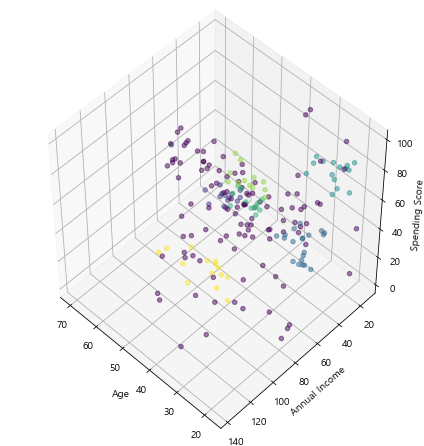

In [151]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect = [0,0,.95,1],elev=48, azim=134)
ax.scatter(r['Age'],r['Annual Income'],r['Spending Score'], c= r['predict'], alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

In [156]:
from sklearn.metrics.cluster import silhouette_score

algorithms = [AgglomerativeClustering(n_clusters=6), KMeans(n_clusters=6, algorithm='auto'),
              DBSCAN(eps=10,min_samples=7),OPTICS(eps=10,min_samples=7)]

for algorithm in algorithms:
    clusters = algorithm.fit_predict(X)
    print("Silhouette score of {} : {:.2f}".format(algorithm.__class__.__name__,
                                   silhouette_score(X,clusters)))

Silhouette score of AgglomerativeClustering : 0.44
Silhouette score of KMeans : 0.45
Silhouette score of DBSCAN : 0.08
Silhouette score of OPTICS : -0.03


 - Kmeans의 실루엣 점수가 0.45로 가장 높고, 0.5에 근접(수업 pdf)하므로 꽤 타당한 군집화 결과라 볼 수 있다